# Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_linear_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [4]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [5]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [13]:
print("own OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.055824506169660844
Test MSE 0.0525832202720848
Train R2 0.0
Test R2 -0.006401323575053297
Train bias 0.055824506169660844
Test bias -0.01828828075931056
Train model variance 3.0814879110195774e-33
Test model variance 0.0

Scikit OLS
Train MSE 0.055089407339345295
Test MSE 0.05916701395001206
Train R2 0.0
Test R2 -0.0002282749383435423
Train bias 0.055089407339345295
Test bias 0.0036746787621029075
Train model variance 0.0
Test model variance 0.0


In [14]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014047160476399656
Test MSE 0.0014080346013896452
Train R2 0.9746929484194756
Test R2 0.9745701028703728
Train bias 0.0018363135784746863
Test bias -5.950963216350075e-05
Train model variance 0.0541069172242488
Test model variance 0.05400293016769054


## Apply OLS with cross validation sampling

In [15]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014020447123953808
Test MSE 0.0014117874438943597
Train R2 0.9747361151331593
Test R2 0.9745234743148352
Train bias 3.449832469076202e-13
Test bias 0.00010229839100387719
Train model variance 0.005390449350672111
Test model variance 0.005493972544845458


## Apply Ridge regression 

In [16]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.00574201760471573
Test MSE 0.004956039883557833
Train R2 0.8975406724096834
Test R2 0.9017574859890609
Train bias 0.0560419288953742
Test bias -0.004669345757943276
Train model variance 0.04833068862970228
Test model variance 0.046097043699185845

scikit ridge
Train MSE 0.005668099406993209
Test MSE 0.0056668294070116604
Train R2 0.8977797169993829
Test R2 0.8986624537665967
Train bias 0.05544985778624488
Test bias 0.002872326523405266
Train model variance 0.04782239360527159
Test model variance 0.049146172186699796


## Apply Ridge regression with bootstrap

In [17]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.005700443505722647
Test MSE 0.005627062213344369
Train R2 0.8974620948775891
Test R2 0.8981810340340886
Train bias 0.001933860714668054
Test bias -0.00017468151507571262
Train model variance 0.04952297955758024
Test model variance 0.04964544989197287


## Apply Ridge regression with cross validation

In [18]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035874300244579994
Test MSE 0.003597091644923817
Train R2 0.9353573436314546
Test R2 0.9351428617197428
Train bias 8.252913611545972e-07
Test bias 0.0002394003045456784
Train model variance 0.004994130078202258
Test model variance 0.004902362216045881


## Apply Lasso regression: Not working properly. High R2 value

In [19]:
lam = np.logspace(-4,0,17)
print(lam)
for lmbda in lam:
    linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=lmbda)
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Train bias", linear_reg.trainbias)
    print("Test bias", linear_reg.testbias)
    print("Train model variance", linear_reg.trainvar)
    print("Test model variance", linear_reg.testvar)
    print("---")


[1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]
Train MSE 0.0061044986635045454
Test MSE 0.006678707471408096
Train R2 0.8889802391229238
Test R2 0.8886438634045317
Train bias 0.05498570384125667
Test bias 0.0036444429159729406
Train model variance 0.04727035543015589
Test model variance 0.04749989782791526
---
Train MSE 0.006502643238215241
Test MSE 0.00611213604764747
Train R2 0.8834821414546755
Test R2 0.8840036373505913
Train bias 0.05580815594911307
Test bias 0.0009134055343404017
Train model variance 0.04701104535518563
Test model variance 0.04393555685194594
---


/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.133e+00, tolerance: 1.478e-01
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.260e+00, tolerance: 1.494e-01
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Train MSE 0.007030348855715553
Test MSE 0.0065300062417893755
Train R2 0.8737752083365624
Test R2 0.8781416009231428
Train bias 0.05569713823849941
Test bias -0.0025048463075195925
Train model variance 0.045509908765689146
Test model variance 0.044521698407038346
---
Train MSE 0.008321946446197687
Test MSE 0.007484693455555418
Train R2 0.8516068250832449
Test R2 0.8504209073341245
Train bias 0.05608068702040076
Test bias -0.005593405729796388
Train model variance 0.04369160387666252
Test model variance 0.04208581437739932
---
Train MSE 0.009281352251163812
Test MSE 0.009136389001178436
Train R2 0.8329279597666076
Test R2 0.8333868420516994
Train bias 0.05555397784380062
Test bias -0.00027723606812528524
Train model variance 0.04028303495568484
Test model variance 0.03916598416245447
---
Train MSE 0.011662336667754602
Test MSE 0.011474288859107255
Train R2 0.7901755965131876
Test R2 0.7903496963682328
Train bias 0.05558455081120835
Test bias 0.001505642241110746
Train model variance 0.0

/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e-01, tolerance: 1.504e-01
  model = cd_fast.enet_coordinate_descent(


Train MSE 0.015801437679908666
Test MSE 0.0153171686913794
Train R2 0.7177261531727328
Test R2 0.6994953499790613
Train bias 0.05598905887281502
Test bias -0.0017520541548388469
Train model variance 0.03256205186660252
Test model variance 0.031243670296251302
---
Train MSE 0.01717383647894399
Test MSE 0.01614641745555265
Train R2 0.6926746948369265
Test R2 0.6896325935692925
Train bias 0.05591310345877793
Test bias 0.003398976310739769
Train model variance 0.026880794800413714
Test model variance 0.02588536131022545
---
Train MSE 0.020503951051227244
Test MSE 0.02176180072219846
Train R2 0.6300908959791325
Test R2 0.6119420221919558
Train bias 0.05552948474266084
Test bias 0.009164259051522097
Train model variance 0.01840620908723991
Test model variance 0.017137272188567167
---
Train MSE 0.029408081438777944
Test MSE 0.03008078598829563
Train R2 0.47015911294133983
Test R2 0.4560284333731265
Train bias 0.05581932722102495
Test bias 0.024150062059183568
Train model variance 0.0079227768

# Regression Comparisons

In [4]:
# For all methods we apply the following parameters
order = np.arange(1,13)
num_points = np.array([25, 50, 75, 100])
noise_var = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
test_ratio = np.round(np.arange(1,5)*0.1, 2)

n_boots = np.array([5, 10], dtype=int)
k_folds = np.array([5, 10], dtype=int)

ridge_lambda = np.array([0.001, 0.01, 0.1, 1.0])
lasso_lambda = np.array([0.00001, 0.0001, 0.001, 0.01])

# Parameters for stochastic gradient descent
learn_rate = np.array([0.001, 0.01, 0.1, 1.0])
num_min_batch = np.array([2, 5, 10, 50])
epochs = np.array([10, 50, 100])

In [24]:
# Save values in numpy file format
np.save("data_linear_regression/order.npy", order)
np.save("data_linear_regression/num_points.npy", num_points)
np.save("data_linear_regression/noise_var.npy", noise_var)
np.save("data_linear_regression/test_ratio.npy", test_ratio)
np.save("data_linear_regression/k_folds.npy", k_folds)
np.save("data_linear_regression/n_boots.npy", n_boots)
np.save("data_linear_regression/ridge_lambda.npy", ridge_lambda)
np.save("data_linear_regression/lasso_lambda.npy", lasso_lambda)
np.save("data_linear_regression/learn_rates.npy", learn_rate)
np.save("data_linear_regression/num_min_batches.npy", num_min_batch)
np.save("data_linear_regression/epochs.npy", epochs)

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

In [25]:
# Define for which regression methods and resampling techniques the statistical indicators should be calculated
"""
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", 
           "ridge_bootstrap_sgd", "ridge_crossvalidation_sgd"]"""
methods = ["ols", "ols_sgd"]

# Loop over specified methods
for method in methods:
    if "crossvalidation" in method:
        test_ratio_array = np.ones(1)*0.1
    else:
        k_folds = np.ones(1, dtype=int)
    if "bootstrap" not in method:
        n_boots = np.ones(1, dtype=int)
    if "ridge" not in method:
        ridge_lambda = np.ones(1)
    if "lasso" not in method:
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var,
                                                                                   test_ratios=test_ratio, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method, 
                                                                                   learn_rate=learn_rate,
                                                                                   num_min_batch=num_min_batch,
                                                                                   epochs=epochs)
    # Save output
    np.save("data_linear_regression/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data_linear_regression/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data_linear_regression/train_R2"+str(method)+".npy", train_R2)
    np.save("data_linear_regression/test_R2"+str(method)+".npy", test_R2)
    np.save("data_linear_regression/test_bias"+str(method)+".npy", test_bias)
    np.save("data_linear_regression/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)


(12, 4, 5, 4, 1, 1, 1, 1, 4, 4, 3)
(12, 4, 5, 4, 1, 1, 1, 1, 4, 4, 3)


In [26]:
"""pool = mp.Pool(processes=5)
#methods = methods = ["e","e","d", "d", "s","d", "d", "s", "ols", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
#           "lasso_crossvalidation", "ols_bootstrap", "ols_crossvalidation", "ridge", 
#           "ridge_bootstrap"]
methods = ["e","e", "ols", "ols_sgd"]
def run_regression(method):
    print(method)
    order = np.load("data_linear_regression/order.npy")
    num_points = np.load("data_linear_regression/num_points.npy")
    noise_var = np.load("data_linear_regression/noise_var.npy")
    test_ratio_array = np.load("data_linear_regression/test_ratio_array.npy")
    k_folds = np.load("data_linear_regression/k_folds.npy")
    n_boots = np.load("data_linear_regression/n_boots.npy")
    ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
    lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")
    
    if "crossvalidation" in method:
        test_ratio_array = np.ones(1)*0.1
    else:
        k_folds = np.ones(1, dtype=int)
    if "bootstrap" not in method:
        n_boots = np.ones(1, dtype=int)
    if "ridge" not in method:
        ridge_lambda = np.ones(1)
    if "lasso" not in method:
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var,
                                                                                   test_ratios=test_ratio, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method, 
                                                                                   learn_rate=learn_rate,
                                                                                   num_min_batch=num_min_batch,
                                                                                   epochs=epochs)
    # Save output
    np.save("data_linear_regression/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data_linear_regression/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data_linear_regression/train_R2"+str(method)+".npy", train_R2)
    np.save("data_linear_regression/test_R2"+str(method)+".npy", test_R2)
    np.save("data_linear_regression/test_bias"+str(method)+".npy", test_bias)
    np.save("data_linear_regression/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)
    print("finished ", method)
    return 0
    
[pool.map(run_regression, methods)]"""

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/amandink/anaconda3/envs/CompSci-Project-1/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/amandink/anaconda3/envs/CompSci-P

KeyboardInterrupt: 

## Widget to compare all experiments

In [6]:
"""methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation",
           "lasso", "lasso_bootstrap", "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", 
           "ridge_bootstrap_sgd", "ridge_crossvalidation_sgd"]"""

methods = ["ols", "ols_sgd"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=test_ratio.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist(), learn_rate=learn_rate.tolist(),
                batch=num_min_batch.tolist(), epoch=epochs.tolist())

DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`

# Bias Variance Tradeoff

In [30]:
#loading data
method = "ols"
order=np.load("data_linear_regression/order.npy")
num_points=np.load("data_linear_regression/num_points.npy")
noise_var=np.load("data_linear_regression/noise_var.npy")
test_ratio=np.load("data_linear_regression/test_ratio.npy")
ridge_lambda=np.load("data_linear_regression/ridge_lambda.npy")
k_folds=np.load("data_linear_regression/k_folds.npy")
n_boots=np.load("data_linear_regression/n_boots.npy")
train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

In [5]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k', label = "bias")
ax.plot(order, ols_var, 'b', label = "variance")
ax.legend()
ax.set_xlabel("order of ploynomial")

def plotOLSstats(num_point, test_ratio, var):
    n_ind = 0
    for i in range(len(num_points)):
        if num_point == num_points[i]:
            n_ind = i
    r_ind = 0
    for i in range(len(test_ratio_array)):
        if test_ratio == test_ratio_array[i]:
            r_ind = i
    noise_ind = 0
    for i in range(len(noise_var)):
        if var == noise_var[i]:
            r_ind = i
            
    ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0,0]
    ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0,0]

    fig, ax = plt.subplots()
    ax.plot(order, ols_bias, 'k', label = "bias")
    ax.plot(order, ols_var, 'b', label = "variance")
    ax.legend()
    ax.set_xlabel("order of ploynomial")
    
widget.interact(plotOLSstats, num_point=num_points.tolist(), 
                test_ratio=test_ratio.tolist(), var=noise_var.tolist())

NameError: name 'test_bias' is not defined

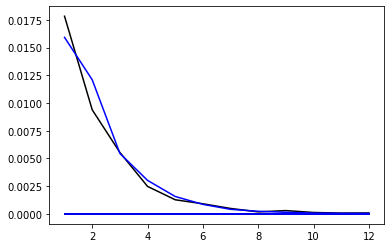

In [41]:
r_ind = 0 # r=0.1
n_ind = 0 # n=100
noise_ind = 4 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k')
ax.plot(order, ols_trainMSE, 'b')

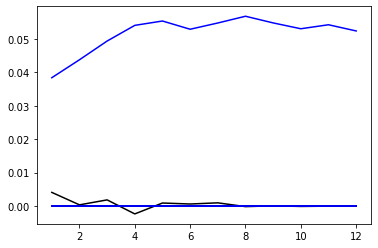

In [37]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k')
ax.plot(order, ols_var, 'b')

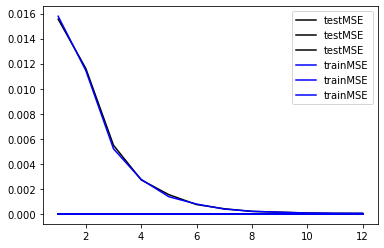

In [42]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0,0,0,0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k', label="testMSE")
ax.plot(order, ols_trainMSE, 'b', label="trainMSE")
ax.legend()

## Functions of model complexity for OLS

In [44]:
def OLS_study(n, var, r):
    n=np.array([n])
    var=np.array([var])
    r=np.array([r])
    order = np.arange(1,21)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var, r)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.25), r=(0.1,0.5,0.1))

interactive(children=(IntSlider(value=100, description='n', max=200, min=10, step=10), FloatSlider(value=0.0, …

<function __main__.OLS_study(n, var, r)>

In [45]:
def lasso_study(n, var, r, lam):
    n = np.array([n])
    var = np.array([var])
    r = np.array([r])
    lam = np.array([lam])
    order = np.arange(1,11)
    method = "lasso"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var,
                                                                                   r, lasso_lambda=lam, reg_type="lasso")
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
import warnings
warnings.filterwarnings("ignore")
widget.interact(lasso_study, n=(10,50,10), var=(0,1,0.25), r=(0.1,0.5,0.1), lam=np.logspace(-5,0,11).tolist())

interactive(children=(IntSlider(value=30, description='n', max=50, min=10, step=10), FloatSlider(value=0.0, de…

<function __main__.lasso_study(n, var, r, lam)>